In [1]:
# %matplotlib inline

In [2]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import hvplot.pandas

# Import the K-means algorithm
from sklearn.cluster import KMeans

# import kaggle dataset main
mentalhealth_data_to_load = "Resources/mental_health_finaldata.csv"

# "Resources\mental_health_finaldata_1.csv"
# read data
mentalhealth_data = pd.read_csv(mentalhealth_data_to_load)

#display df head for preview
mentalhealth_data.head()

# ran using downg_sqlalch environment

,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness
0,20-25,Female,Corporate,1-14 days,Yes,Yes,No,Yes,Yes,Medium,No,No,Yes
1,30-Above,Male,Others,31-60 days,Yes,Yes,Maybe,No,No,High,No,No,Yes
2,30-Above,Female,Student,Go out Every day,No,No,Yes,No,No,Medium,Yes,Maybe,No
3,25-30,Male,Others,1-14 days,Yes,No,Maybe,No,Maybe,Medium,No,Maybe,Yes
4,16-20,Female,Student,More than 2 months,Yes,Yes,Yes,No,Yes,Medium,Yes,Maybe,No


In [3]:
# what is the total number of young adults surveyed?
total_surveyed =  mentalhealth_data['Gender'].count()
print(f'This study surveyed {total_surveyed} young adults.')

This study surveyed 824 young adults.


In [4]:
#what are the age ranges for the young adults studied?
age_ranges = mentalhealth_data['Age'].value_counts()
age_ranges

Age
30-Above    222
16-20       211
25-30       205
20-25       186
Name: count, dtype: int64

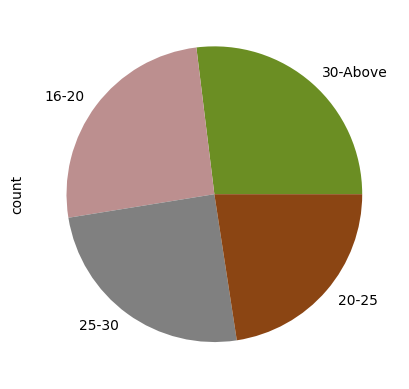

In [5]:
age_ranges.plot.pie(colors=['olivedrab', 'rosybrown', 'gray', 'saddlebrown'])
plt.show()

In [6]:
#becasuse capitalism
#what are the dirrefent occupation classificatin levels for the young adults studied?
job_types = mentalhealth_data['Occupation'].value_counts()
job_types

Occupation
Housewife    185
Student      180
Corporate    159
Others       155
Business     145
Name: count, dtype: int64

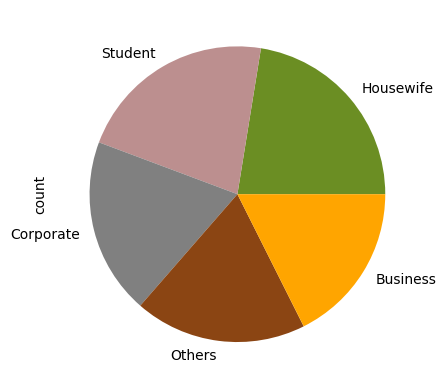

In [7]:
job_types.plot.pie(colors=['olivedrab', 'rosybrown', 'gray', 'saddlebrown', 'orange'])
plt.show()

Segmenting and K-Means (Supervised learning)

In [8]:
mentalhealth_data.head()

,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness
0,20-25,Female,Corporate,1-14 days,Yes,Yes,No,Yes,Yes,Medium,No,No,Yes
1,30-Above,Male,Others,31-60 days,Yes,Yes,Maybe,No,No,High,No,No,Yes
2,30-Above,Female,Student,Go out Every day,No,No,Yes,No,No,Medium,Yes,Maybe,No
3,25-30,Male,Others,1-14 days,Yes,No,Maybe,No,Maybe,Medium,No,Maybe,Yes
4,16-20,Female,Student,More than 2 months,Yes,Yes,Yes,No,Yes,Medium,Yes,Maybe,No


In [9]:
# Mapping 'Yes' to 1 and 'No' to 0 for selected columns
columns_to_map = ["Growing_Stress", "Quarantine_Frustrations", "Changes_Habits", "Mental_Health_History", "Weight_Change", "Mood_Swings", "Coping_Struggles", "Work_Interest", "Social_Weakness"]

for column in columns_to_map:
    mentalhealth_data[column] = mentalhealth_data[column].map({'Yes': 1, 'No': 0})

    print(mentalhealth_data)

          Age  Gender Occupation        Days_Indoors  Growing_Stress  \
0       20-25  Female  Corporate           1-14 days             1.0   
1    30-Above    Male     Others          31-60 days             1.0   
2    30-Above  Female    Student    Go out Every day             0.0   
3       25-30    Male     Others           1-14 days             1.0   
4       16-20  Female    Student  More than 2 months             1.0   
..        ...     ...        ...                 ...             ...   
819     20-25    Male  Corporate    Go out Every day             0.0   
820     20-25    Male     Others           1-14 days             1.0   
821     20-25    Male    Student  More than 2 months             1.0   
822     16-20    Male   Business          15-30 days             0.0   
823  30-Above  Female     Others          15-30 days             0.0   

    Quarantine_Frustrations Changes_Habits Mental_Health_History  \
0                       Yes             No                   Yes   

In [10]:
data_types = mentalhealth_data.dtypes
data_types

Age                         object
Gender                      object
Occupation                  object
Days_Indoors                object
Growing_Stress             float64
Quarantine_Frustrations    float64
Changes_Habits             float64
Mental_Health_History      float64
Weight_Change              float64
Mood_Swings                float64
Coping_Struggles             int64
Work_Interest              float64
Social_Weakness            float64
dtype: object

In [11]:
int_columns = ["Growing_Stress", "Quarantine_Frustrations", "Changes_Habits", "Mental_Health_History","Weight_Change", "Mood_Swings", "Coping_Struggles", "Work_Interest", "Social_Weakness"]

mentalhealth_data[int_columns] = mentalhealth_data[int_columns].astype(int)


IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [ ]:
mentalhealth_data

,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness
0,20-25,Female,Corporate,1-14 days,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,30-Above,Male,Others,31-60 days,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,30-Above,Female,Student,Go out Every day,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25-30,Male,Others,1-14 days,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16-20,Female,Student,More than 2 months,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,20-25,Male,Corporate,Go out Every day,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
820,20-25,Male,Others,1-14 days,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
821,20-25,Male,Student,More than 2 months,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
822,16-20,Male,Business,15-30 days,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# # Visualize a scatter plot of the data
# mentalhealth_data.hvplot.scatter(
#     x="Occupation", 
#     # y="Growing_stress"
# )